In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
Healthy = pd.read_csv('../input/healthy-lifestyle-cities-report-2021/healthy_lifestyle_city_2021.csv')
Healthy.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


In [3]:
#Data inspection and cleaning

In [4]:
Healthy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     object 
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [5]:
Healthy['Sunshine hours(City)'] = Healthy['Sunshine hours(City)'].apply(lambda x: np.nan if x == '-' else int(x))
Healthy['Cost of a bottle of water(City)'] = Healthy['Cost of a bottle of water(City)'].apply(lambda x: float(x[1:]))
Healthy['Obesity levels(Country)'] = Healthy['Obesity levels(Country)'].apply(lambda x:  float(x.split('%')[0]))
Healthy['Pollution(Index score) (City)'] = Healthy['Pollution(Index score) (City)'].apply(lambda x: np.nan if x == '-' else float(x))
Healthy['Annual avg. hours worked'] = Healthy['Annual avg. hours worked'].apply(lambda x: np.nan if x == '-' else int(x))
Healthy['Cost of a monthly gym membership(City)'] = Healthy['Cost of a monthly gym membership(City)'].apply(lambda x: float(x[1:]))

In [6]:
Healthy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    43 non-null     float64
 3   Cost of a bottle of water(City)         44 non-null     float64
 4   Obesity levels(Country)                 44 non-null     float64
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           43 non-null     float64
 7   Annual avg. hours worked                33 non-null     float64
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [7]:
Healthy.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422,1048,34.90
1,Sydney,2,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406,1103,41.66
2,Vienna,3,1884.0,1.94,20.1,81.0,17.33,1501.0,7.29,132,1008,25.74
3,Stockholm,4,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129,598,37.31
4,Copenhagen,5,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154,523,32.53


In [8]:
Healthy.drop('Rank',axis=1,inplace=True)

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [10]:
City = Healthy.City
Healthy.drop('City',axis=1,inplace=True)
col = Healthy.columns
imputer = IterativeImputer(max_iter=100)
Healthy = imputer.fit_transform(Healthy)
Healthy = pd.DataFrame(Healthy,columns=col)
Healthy['City'] = City
Healthy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Sunshine hours(City)                    44 non-null     float64
 1   Cost of a bottle of water(City)         44 non-null     float64
 2   Obesity levels(Country)                 44 non-null     float64
 3   Life expectancy(years) (Country)        44 non-null     float64
 4   Pollution(Index score) (City)           44 non-null     float64
 5   Annual avg. hours worked                44 non-null     float64
 6   Happiness levels(Country)               44 non-null     float64
 7   Outdoor activities(City)                44 non-null     float64
 8   Number of take out places(City)         44 non-null     float64
 9   Cost of a monthly gym membership(City)  44 non-null     float64
 10  City                                    44 non-null     object 


In [11]:
Healthy.head()

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),City
0,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422.0,1048.0,34.90,Amsterdam
1,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406.0,1103.0,41.66,Sydney
2,1884.0,1.94,20.1,81.0,17.33,1501.0,7.29,132.0,1008.0,25.74,Vienna
3,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129.0,598.0,37.31,Stockholm
4,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154.0,523.0,32.53,Copenhagen


In [12]:
#EDA

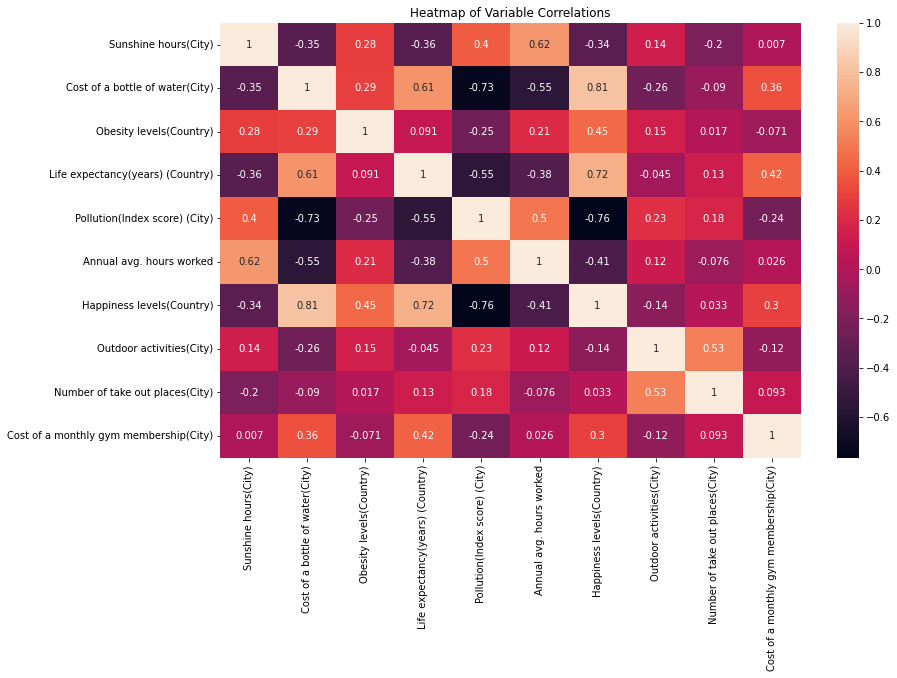

In [13]:
plt.figure(figsize=(13,8))
sns.heatmap(Healthy.corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

In [14]:
#Let us plot the Happiness levels against the rest of the variables. 

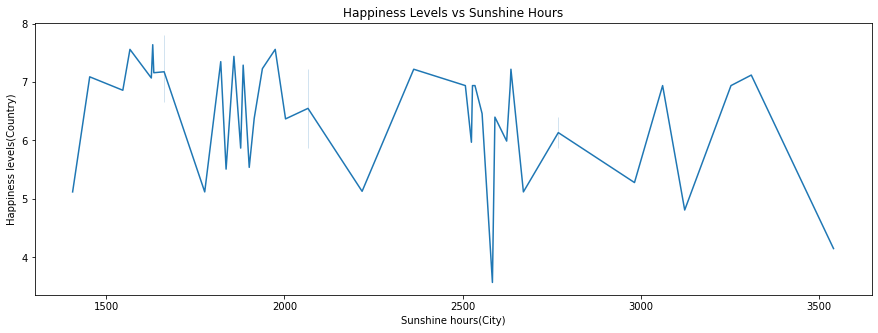

In [15]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Sunshine hours(City)',y='Happiness levels(Country)',data=Healthy)
plt.title('Happiness Levels vs Sunshine Hours')
plt.show()

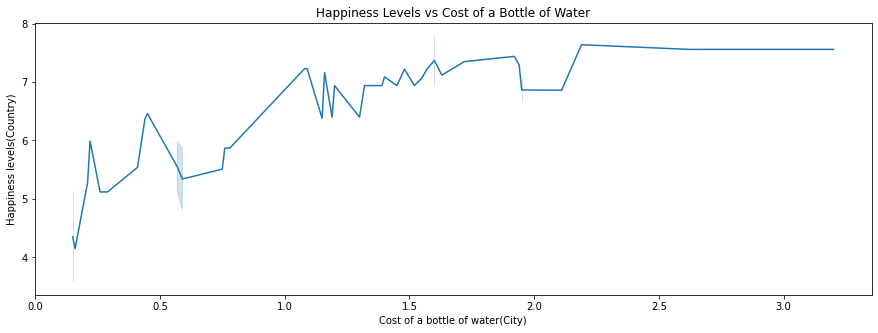

In [16]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Cost of a bottle of water(City)',y='Happiness levels(Country)',data=Healthy)
plt.title('Happiness Levels vs Cost of a Bottle of Water')
plt.show()

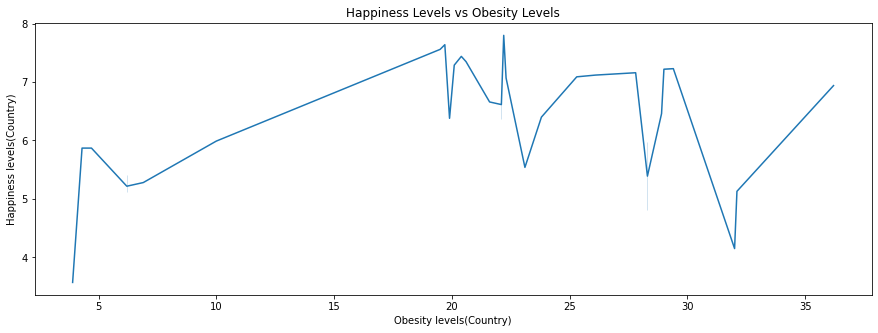

In [17]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Obesity levels(Country)',y='Happiness levels(Country)',data=Healthy)
plt.title('Happiness Levels vs Obesity Levels')
plt.show()

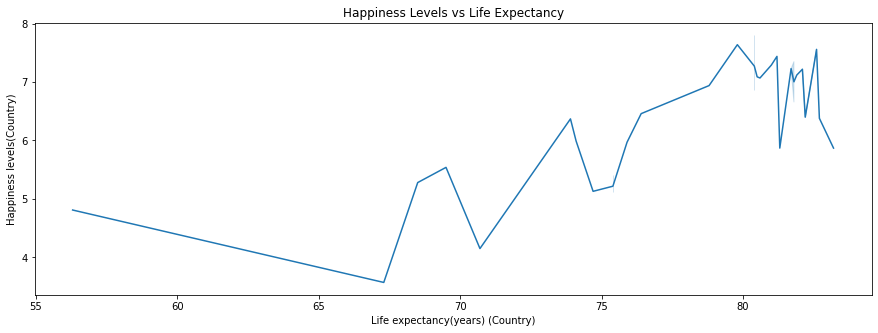

In [18]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Life expectancy(years) (Country)',y='Happiness levels(Country)',data=Healthy)
plt.title('Happiness Levels vs Life Expectancy')
plt.show()

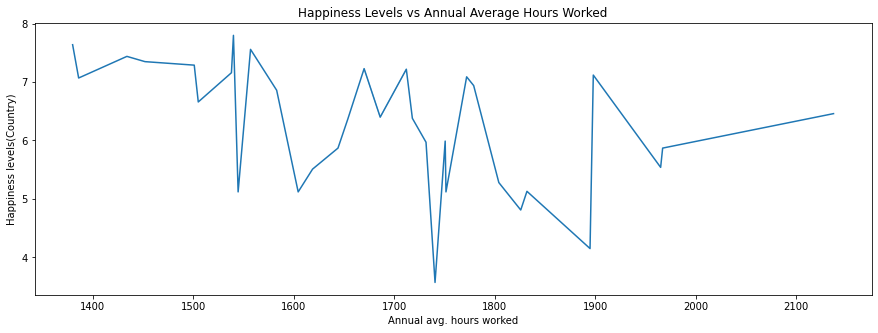

In [19]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Annual avg. hours worked',y='Happiness levels(Country)',data=Healthy)
plt.title('Happiness Levels vs Annual Average Hours Worked')
plt.show()

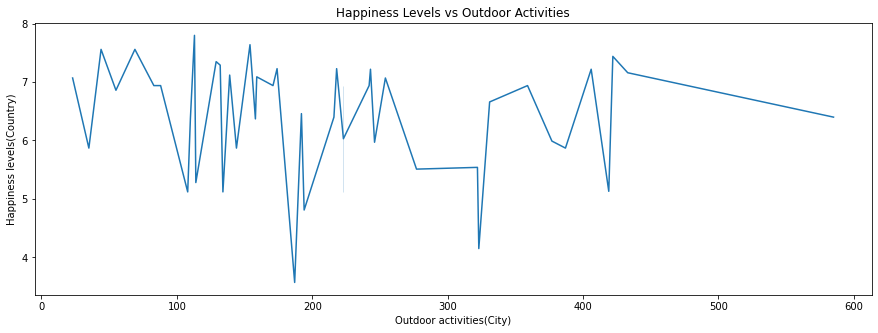

In [20]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Outdoor activities(City)',y='Happiness levels(Country)',data=Healthy)
plt.title('Happiness Levels vs Outdoor Activities')
plt.show()

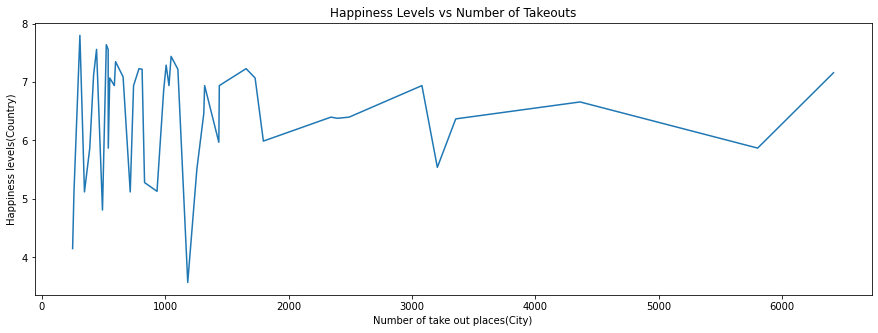

In [21]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Number of take out places(City)',y='Happiness levels(Country)',data=Healthy)
plt.title('Happiness Levels vs Number of Takeouts')
plt.show()

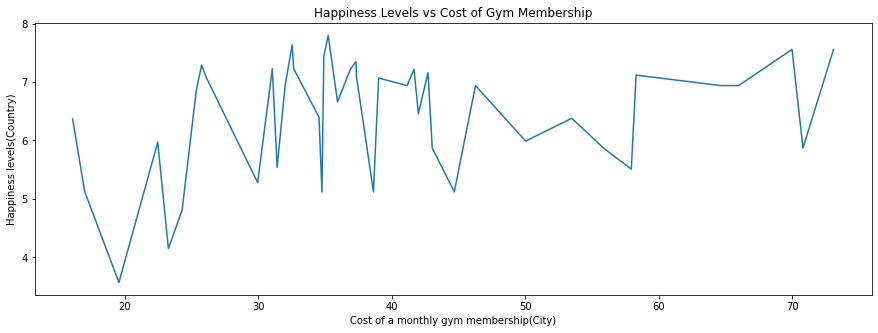

In [22]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Cost of a monthly gym membership(City)',y='Happiness levels(Country)',data=Healthy)
plt.title('Happiness Levels vs Cost of Gym Membership')
plt.show()

In [23]:
#Model building

In [24]:
#We will build models to predict levels of happiness as well as cluster the cities based on all these variables. 

In [25]:
Healthy.head()

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),City
0,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422.0,1048.0,34.90,Amsterdam
1,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406.0,1103.0,41.66,Sydney
2,1884.0,1.94,20.1,81.0,17.33,1501.0,7.29,132.0,1008.0,25.74,Vienna
3,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129.0,598.0,37.31,Stockholm
4,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154.0,523.0,32.53,Copenhagen


In [26]:
Healthy['Happiness levels(Country)'].describe()

count    44.000000
mean      6.435000
std       0.991202
min       3.570000
25%       5.870000
50%       6.900000
75%       7.175000
max       7.800000
Name: Happiness levels(Country), dtype: float64

In [27]:
#We can use a linear model since we have pretty good correlations between the target and independent variables. 

In [28]:
Healthy_Pred = Healthy.drop('City',axis=1)
Healthy_Pred.head()

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422.0,1048.0,34.90
1,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406.0,1103.0,41.66
2,1884.0,1.94,20.1,81.0,17.33,1501.0,7.29,132.0,1008.0,25.74
3,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129.0,598.0,37.31
4,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154.0,523.0,32.53


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [30]:
X = Healthy_Pred.drop('Happiness levels(Country)',axis=1)
y = Healthy_Pred['Happiness levels(Country)']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)
X_train.head()

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
20,3311.0,1.63,26.1,81.9,47.28,1898.0,139.0,420.0,58.31
7,1626.0,1.55,22.3,80.6,39.41,1386.0,254.0,1729.0,26.11
41,2535.0,1.32,36.2,78.8,57.36,1779.0,359.0,3081.0,64.66
18,1662.0,1.95,22.3,80.6,37.78,1386.0,23.0,551.0,39.01
21,2218.0,0.15,32.1,74.7,69.49,1832.0,419.0,934.0,16.97


In [31]:
col = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=col)
X_train.head()

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,1.781379,0.680680,0.404037,0.712019,-0.177094,1.458412,-0.772843,-0.876574,1.351445
1,-1.146273,0.568711,-0.006482,0.485889,-0.536796,-1.901333,0.160412,0.130920,-0.847396
2,0.433096,0.246799,1.495152,0.172786,0.283618,0.677534,1.012514,1.171511,1.785068
3,-1.083723,1.128558,-0.006482,0.485889,-0.611296,-1.901333,-1.714213,-0.775748,0.033506
4,-0.117685,-1.390753,1.052224,-0.540392,0.838025,1.025320,1.499430,-0.480965,-1.471539


In [32]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=col)
X_test.head()

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,0.839666,-0.508994,-1.951043,0.938149,0.162415,-0.208337,-1.616830,-0.784984,1.184825
1,-0.381782,-0.774921,-1.907831,0.607652,0.304642,1.911190,-0.732267,-0.900434,0.308020
2,-0.541640,2.066301,-0.308969,0.833781,-1.092574,-0.779231,-1.543793,-0.858102,2.149720
3,0.386184,0.078845,1.495152,0.172786,-0.357630,0.677534,-0.513155,-0.183874,0.178957
4,-1.134110,0.022860,0.587690,0.451100,0.354461,-0.903909,1.613043,3.739122,0.286168


In [33]:
#Ridge Regression

In [34]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV

In [35]:
Model = Ridge(random_state=100)

params = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,scoring='r2',verbose=1,n_jobs=-1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=Ridge(random_state=100), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             scoring='r2', verbose=1)

In [36]:
Model_best = grid_search.best_estimator_

In [37]:
from sklearn.metrics import r2_score

In [38]:
y_train_pred = Model_best.predict(X_train)
y_test_pred = Model_best.predict(X_test)

print('Train R Squared Score :',r2_score(y_train,y_train_pred))
print('Test R Squared Score :',r2_score(y_test,y_test_pred))

Train R Squared Score : 0.8222455169845134
Test R Squared Score : 0.7633738377458963


In [39]:
Feature_Coef = pd.DataFrame({'Feature':X_train.columns,'Coefficient':Model_best.coef_})
Feature_Coef.sort_values('Coefficient',ascending=False,inplace=True)
Feature_Coef.set_index('Feature',inplace=True)
Feature_Coef

,Coefficient
Feature,
Life expectancy(years) (Country),0.252846
Cost of a bottle of water(City),0.246715
Obesity levels(Country),0.159363
Number of take out places(City),0.045527
Cost of a monthly gym membership(City),0.022416
Sunshine hours(City),0.007499
Outdoor activities(City),-0.070956
Annual avg. hours worked,-0.093478
Pollution(Index score) (City),-0.223373


In [40]:
#As get pretty good R squared scores. We will now try some Ensemble models like random forests and gradient boosting.

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
Model = RandomForestRegressor(random_state=100,n_jobs=-1)

params = {'n_estimators':[100],
          'max_depth':[3,5,8,10,11,12],
          'min_samples_leaf':[1,2,3],
          'max_features':[0.05,0.1,0.15,0.2]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,scoring='r2',verbose=1,n_jobs=-1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8, 10, 11, 12],
                         'max_features': [0.05, 0.1, 0.15, 0.2],
                         'min_samples_leaf': [1, 2, 3], 'n_estimators': [100]},
             scoring='r2', verbose=1)

In [43]:
Model_best = grid_search.best_estimator_

In [44]:
y_train_pred = Model_best.predict(X_train)
y_test_pred = Model_best.predict(X_test)

print('Train R Squared Score :',r2_score(y_train,y_train_pred))
print('Test R Squared Score :',r2_score(y_test,y_test_pred))

Train R Squared Score : 0.9484797032090311
Test R Squared Score : 0.6092106449847168


In [45]:
Feature_Importances = pd.DataFrame({'Feature':X_train.columns,'Importance':Model_best.feature_importances_})
Feature_Importances.sort_values('Importance',ascending=False,inplace=True)
Feature_Importances.set_index('Feature',inplace=True)
Feature_Importances

,Importance
Feature,
Life expectancy(years) (Country),0.171987
Cost of a bottle of water(City),0.147237
Pollution(Index score) (City),0.136514
Sunshine hours(City),0.104362
Obesity levels(Country),0.102288
Annual avg. hours worked,0.099180
Number of take out places(City),0.093141
Cost of a monthly gym membership(City),0.090108
Outdoor activities(City),0.055183


In [46]:
#As we can see the model overfits a lot more than the linear ridge model. We will nowt try gradient boosting. 

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
Model = GradientBoostingRegressor(random_state=100)

params = {'learning_rate':[0.1,0.2,0.3,0.4],
          'max_depth':[3,5,8,10,11,12],
          'min_samples_leaf':[1,2,3],
          'max_features':[0.05,0.1,0.15,0.2]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,scoring='r2',verbose=1,n_jobs=-1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(estimator=GradientBoostingRegressor(random_state=100), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 5, 8, 10, 11, 12],
                         'max_features': [0.05, 0.1, 0.15, 0.2],
                         'min_samples_leaf': [1, 2, 3]},
             scoring='r2', verbose=1)

In [49]:
Model_best = grid_search.best_estimator_

In [50]:
y_train_pred = Model_best.predict(X_train)
y_test_pred = Model_best.predict(X_test)

print('Train R Squared Score :',r2_score(y_train,y_train_pred))
print('Test R Squared Score :',r2_score(y_test,y_test_pred))

Train R Squared Score : 0.9999999560240235
Test R Squared Score : 0.643239522050594


In [51]:
Feature_Importances = pd.DataFrame({'Feature':X_train.columns,'Importance':Model_best.feature_importances_})
Feature_Importances.sort_values('Importance',ascending=False,inplace=True)
Feature_Importances.set_index('Feature',inplace=True)
Feature_Importances

,Importance
Feature,
Cost of a bottle of water(City),0.180316
Cost of a monthly gym membership(City),0.179046
Obesity levels(Country),0.158438
Pollution(Index score) (City),0.108360
Life expectancy(years) (Country),0.088269
Annual avg. hours worked,0.086994
Number of take out places(City),0.080901
Sunshine hours(City),0.073136
Outdoor activities(City),0.044539


In [52]:
#The model overfits the data even more. This is probably because of the low number of sample available. 

In [53]:
#Clustering Cities 

In [54]:
Healthy = Healthy.groupby('City').mean()
Healthy.head()

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
City,,,,,,,,,,
Amsterdam,1858.0,1.92,20.4,81.2,30.93,1434.000000,7.44,422.0,1048.0,34.90
Bangkok,2624.0,0.22,10.0,74.1,76.64,1750.652313,5.99,377.0,1796.0,50.03
Barcelona,2591.0,1.19,23.8,82.2,65.19,1686.000000,6.40,585.0,2344.0,37.80
Beijing,2671.0,0.26,6.2,75.4,85.43,1751.432008,5.12,223.0,261.0,38.62
Berlin,1626.0,1.55,22.3,80.6,39.41,1386.000000,7.07,254.0,1729.0,26.11


In [55]:
scaler = StandardScaler()
col = Healthy.columns
Healthy_Clust = scaler.fit_transform(Healthy)
Healthy_Clust = pd.DataFrame(Healthy_Clust,columns=col)
Healthy_Clust.head()

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,-0.686679,1.050902,-0.151303,0.576878,-0.949133,-1.543390,1.025642,1.654432,-0.287788,-0.372094
1,0.691423,-1.342020,-1.183136,-0.777116,1.190812,0.406091,-0.454140,1.296541,0.257031,0.647795
2,0.632053,0.023353,0.186028,0.767581,0.654772,0.008057,-0.035719,2.950792,0.656178,-0.176610
3,0.775980,-1.285715,-1.560152,-0.529202,1.602322,0.410891,-1.342010,0.071759,-0.861015,-0.121335
4,-1.104068,0.530090,0.037206,0.462456,-0.552136,-1.838904,0.648043,0.318306,0.208231,-0.964614


In [56]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [57]:
hopkins(Healthy_Clust)

0.6250050943697079

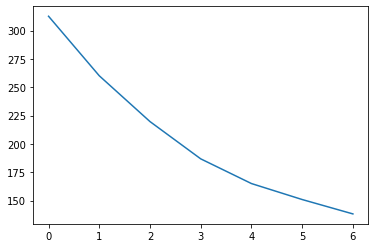

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Healthy_Clust)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

In [59]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Healthy_Clust)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(Healthy_Clust, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2620818916259195
For n_clusters=3, the silhouette score is 0.20250194926609488
For n_clusters=4, the silhouette score is 0.22295286363047156
For n_clusters=5, the silhouette score is 0.22818678276473803
For n_clusters=6, the silhouette score is 0.21938337317585013
For n_clusters=7, the silhouette score is 0.2541915120017516
For n_clusters=8, the silhouette score is 0.23261043914281865


In [60]:
#Clustering the authors into 5 clusters.

In [61]:
kmeans = KMeans(n_clusters=5,max_iter=100)
kmeans.fit(Healthy_Clust)

KMeans(max_iter=100, n_clusters=5)

In [62]:
Healthy['Cluster_ID'] = kmeans.labels_
Healthy.head()

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Cluster_ID
City,,,,,,,,,,,
Amsterdam,1858.0,1.92,20.4,81.2,30.93,1434.000000,7.44,422.0,1048.0,34.90,0
Bangkok,2624.0,0.22,10.0,74.1,76.64,1750.652313,5.99,377.0,1796.0,50.03,4
Barcelona,2591.0,1.19,23.8,82.2,65.19,1686.000000,6.40,585.0,2344.0,37.80,3
Beijing,2671.0,0.26,6.2,75.4,85.43,1751.432008,5.12,223.0,261.0,38.62,4
Berlin,1626.0,1.55,22.3,80.6,39.41,1386.000000,7.07,254.0,1729.0,26.11,0


In [63]:
#Plotting the Clusters

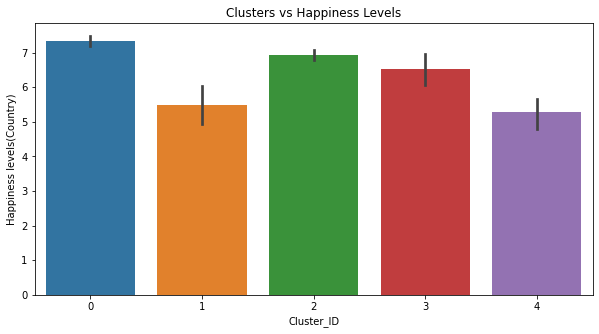

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(y='Happiness levels(Country)',x='Cluster_ID',data=Healthy)
plt.title('Clusters vs Happiness Levels')
plt.show()

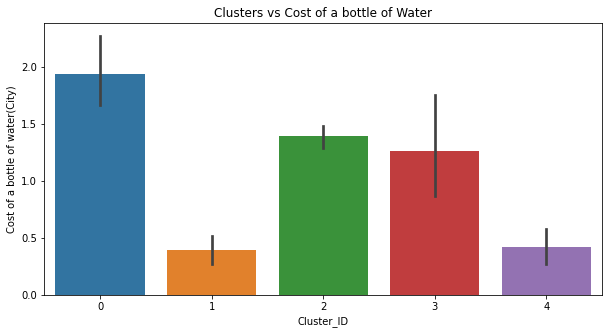

In [65]:
plt.figure(figsize=(10,5))
sns.barplot(y='Cost of a bottle of water(City)',x='Cluster_ID',data=Healthy)
plt.title('Clusters vs Cost of a bottle of Water')
plt.show()

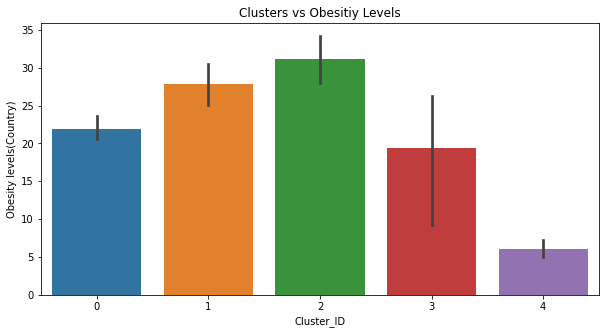

In [66]:
plt.figure(figsize=(10,5))
sns.barplot(y='Obesity levels(Country)',x='Cluster_ID',data=Healthy)
plt.title('Clusters vs Obesitiy Levels')
plt.show()

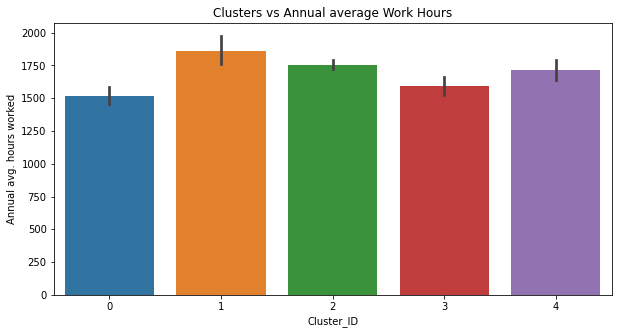

In [67]:
plt.figure(figsize=(10,5))
sns.barplot(y='Annual avg. hours worked',x='Cluster_ID',data=Healthy)
plt.title('Clusters vs Annual average Work Hours')
plt.show()

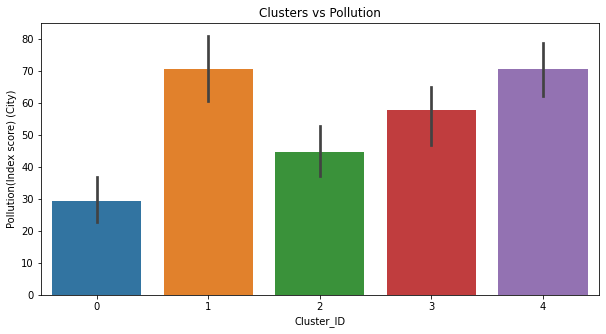

In [68]:
plt.figure(figsize=(10,5))
sns.barplot(y='Pollution(Index score) (City)',x='Cluster_ID',data=Healthy)
plt.title('Clusters vs Pollution')
plt.show()

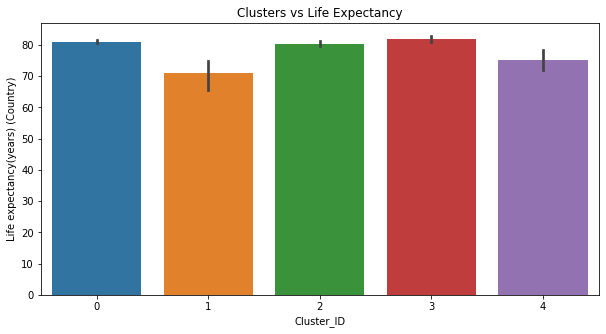

In [69]:
plt.figure(figsize=(10,5))
sns.barplot(y='Life expectancy(years) (Country)',x='Cluster_ID',data=Healthy)
plt.title('Clusters vs Life Expectancy')
plt.show()

In [70]:
#Printing the Clusters

In [71]:
print('Cluster 1:',list(Healthy[Healthy.Cluster_ID==0].index))

Cluster 1: ['Amsterdam', 'Berlin', 'Brussels', 'Copenhagen', 'Dublin', 'Frankfurt', 'Geneva', 'Helsinki', 'Stockholm', 'Vancouver', 'Vienna', 'Zurich']


In [72]:
print('Cluster 2 :',list(Healthy[Healthy.Cluster_ID==1].index))

Cluster 2 : ['Buenos Aires', 'Cairo', 'Istanbul', 'Johannesburg', 'Mexico City', 'Moscow', 'Sao Paulo']


In [73]:
print('Cluster 3 :',list(Healthy[Healthy.Cluster_ID==2].index))

Cluster 3 : ['Boston', 'Chicago', 'Los Angeles', 'Madrid', 'Melbourne', 'Milan', 'New York', 'San Francisco', 'Sydney', 'Tel Aviv', 'Toronto', 'Washington, D.C.']


In [74]:
print('Cluster 4 :',list(Healthy[Healthy.Cluster_ID==3].index))

Cluster 4 : ['Barcelona', 'London', 'Paris', 'Tokyo']


In [75]:
print('Cluster 5 :',list(Healthy[Healthy.Cluster_ID==4].index))

Cluster 5 : ['Bangkok', 'Beijing', 'Fukuoka', 'Hong Kong', 'Jakarta', 'Mumbai', 'Seoul', 'Shanghai', 'Taipei']


In [76]:
# END FOR NOW #